In [1]:
import requests
import json
import pandas as pd

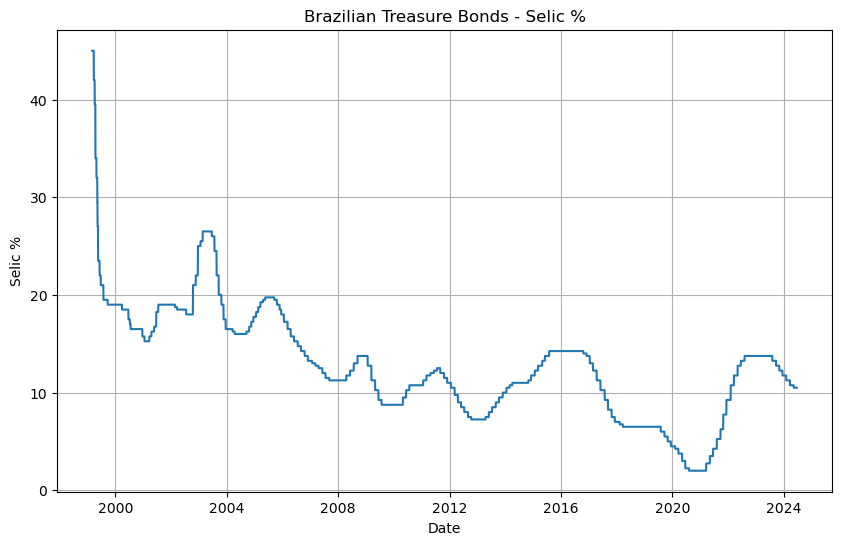

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# dadosabertos.bcb.gov.br

codigo = 432
url_bc_selic = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

dados_selic = requests.get(url_bc_selic)
json_selic = dados_selic.json()
df_selic = pd.DataFrame(json_selic)

# Assuming your DataFrame has columns 'data' and 'valor'
df_selic['data'] = pd.to_datetime(df_selic['data'], dayfirst=True)  # Converting 'data' column to datetime format
df_selic['valor'] = pd.to_numeric(df_selic['valor'])  # Converting 'valor' column to numeric

# Sort DataFrame by 'data' column
df_selic = df_selic.sort_values(by='data')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_selic['data'], df_selic['valor'], linestyle='-')
plt.title('Brazilian Treasure Bonds - Selic %')
plt.xlabel('Date')
plt.ylabel('Selic %')
plt.grid(True)
plt.show()

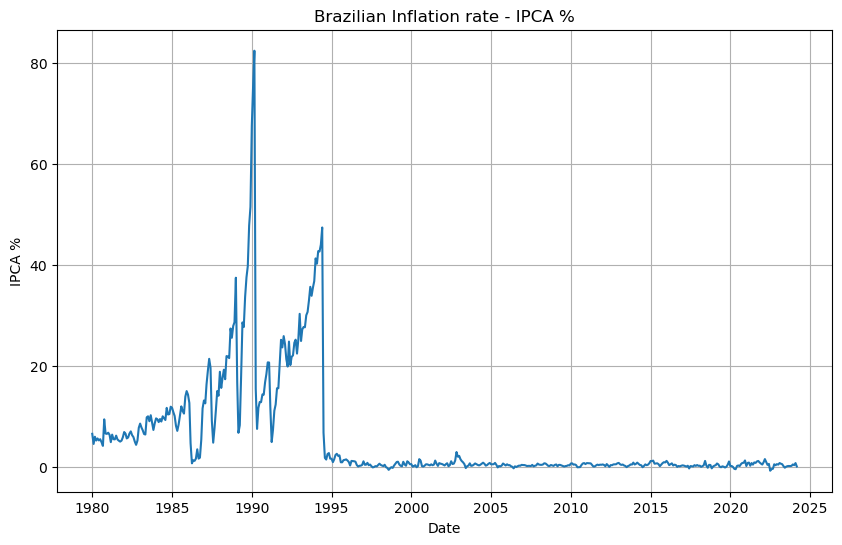

In [5]:
codigo = 433
url_bc_ipca = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

dados_ipca = requests.get(url_bc_ipca)
json_ipca = dados_ipca.json()
df_ipca = pd.DataFrame(json_ipca)

# Assuming your DataFrame has columns 'data' and 'valor'
df_ipca['data'] = pd.to_datetime(df_ipca['data'], dayfirst=True)  # Converting 'data' column to datetime format
df_ipca['valor'] = pd.to_numeric(df_ipca['valor'])  # Converting 'valor' column to numeric

# Sort DataFrame by 'data' column
df_ipca = df_ipca.sort_values(by='data')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_ipca['data'], df_ipca['valor'], linestyle='-')
plt.title('Brazilian Inflation rate - IPCA %')
plt.xlabel('Date')
plt.ylabel('IPCA %')
plt.grid(True)
plt.show()

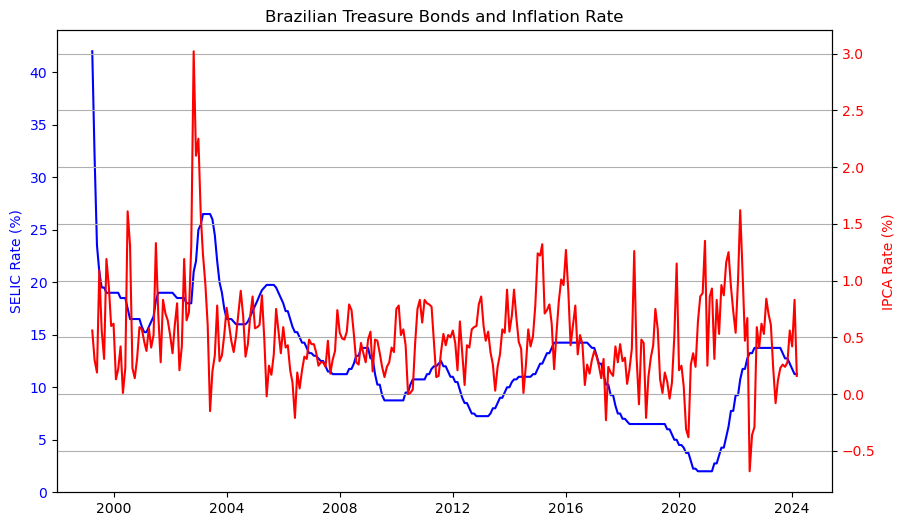

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Get SELIC data
codigo_selic = 432
url_bc_selic = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_selic}/dados?formato=json'
dados_selic = requests.get(url_bc_selic)
df_selic = pd.DataFrame(dados_selic.json())
df_selic['data'] = pd.to_datetime(df_selic['data'], dayfirst=True)
df_selic['valor'] = pd.to_numeric(df_selic['valor'])

# Get IPCA data
codigo_ipca = 433
url_bc_ipca = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_ipca}/dados?formato=json'
dados_ipca = requests.get(url_bc_ipca)
df_ipca = pd.DataFrame(dados_ipca.json())
df_ipca['data'] = pd.to_datetime(df_ipca['data'], dayfirst=True)
df_ipca['valor'] = pd.to_numeric(df_ipca['valor'])

# Merge DataFrames on 'data' column, keeping only rows where dates match
merged_df = pd.merge(df_selic, df_ipca, on='data', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot SELIC on primary y-axis
ax1.plot(merged_df['data'], merged_df['valor_x'], label='SELIC', color='blue')
ax1.set_ylabel('SELIC Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for IPCA
ax2 = ax1.twinx()
ax2.plot(merged_df['data'], merged_df['valor_y'], label='IPCA', color='red')
ax2.set_ylabel('IPCA Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Brazilian Treasure Bonds and Inflation Rate')
plt.xlabel('Date')
plt.grid(True)
plt.show()
